<a href=""><img src = "https://cdn-images-1.medium.com/max/1200/1*u16a0WbJeckSdi6kGD3gVA.jpeg" width = 400> </a>
<h1 align="center"><font size=5 color="DE5538">Iris Dataset</font></h1>

## Introduction
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.<br>
The original dataset can be found here. The creators would like to note that in case you find the dataset useful, please make a reference to previous paper and the web page: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ in your papers, research, etc.

In [13]:
# Import all required Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 100)
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)

Let's download the file form URL and import for analysis.<br>
Change the column names from ```v1,v2``` to ```label,text``` 

In [19]:
url = 'https://www.kaggle.com/uciml/sms-spam-collection-dataset/download/Nwxy62msNMwULSAhKtWC%2Fversions%2FI0b9Xlt4phpbdf2aeIeA%2Ffiles%2Fspam.csv?datasetVersionNumber=1'
# df = pd.read_csv(url, encoding='latin-1', usecols=['v1','v2'] )
df = pd.read_csv('spam.csv', encoding='latin-1', usecols=['v1','v2'] )
# Change the column names 
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


Input data has 5572 rows and 2 columns


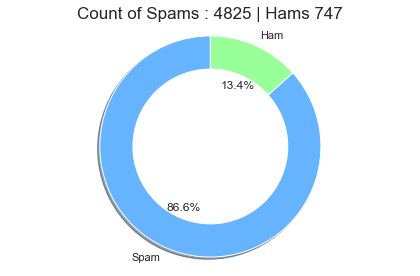

In [15]:
print(f"Input data has {df.shape[0]} rows and {df.shape[1]} columns")
df_count = df['label'].value_counts()
# print(f"Number of spams : {df_count[0]} | No. of hams {df_count[1]}")

fig, ax = plt.subplots()
colors = ['#66b3ff','#99ff99','#ffcc99']
patches, text, autotext = ax.pie(df_count, labels=['Spam','Ham'], autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.title(f"Count of Spams : {df_count[0]} | Hams {df_count[1]}", fontsize=17)
plt.tight_layout()
plt.show()

## Data Preparation
Let's prepare the data by performing below operations on the text.<br>
<li>Remove all the unwanted characters and punctuations
<li>Convert text to tokens of String
<li>Remove the stopwords 
<li>Perform Lamentizing on the tokens
<li>Merge the tokens to form final text for feature engineering
    

In [16]:
# Import the required libraries
import string
import re
import nltk

stopwords = nltk.corpus.stopwords.words('english')

# ps = nltk.PorterStemmer()
# Download the Wordnet package if not available, it is required by Lemmantizer
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amaindola\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
# Function to remove punctuation from given string
def remove_puntuaction(text):
    return ''.join([char for char in text if char not in string.punctuation])

# Function to Tokenize the given string and remove stopwords from them
def tokenize_stopwords(text):
    tokens = [word for word in re.split('\W+', text) if word not in stopwords]
    return tokens

# Funciton to perform stemming on the Words
def stemming(tokens):
    return [ps.stem(word) for word in tokens]
    
# Funciton to perform stemming on the Words
def lamentize(tokens):
    return [wn.lemmatize(word) for word in tokens]

# Function to remove punctuation and Tokenize
def clean_text(text):
    text = remove_puntuaction(text)
    tokens = tokenize_stopwords(text)
    text = ' '.join(lamentize(tokens))
    return text
    

In [18]:
df['tokens'] = df['text'].apply(lambda x : tokenize_stopwords(remove_puntuaction(x).lower()))
df['lamented_tokens'] = df['tokens'].apply(lambda x : lamentize(x))
df['final_text'] = df['lamented_tokens'].apply(lambda x : ' '.join([word for word in x]) )
df.head()

,label,text,tokens,lamented_tokens,final_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]",go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questions...
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]",nah dont think go usf life around though


Now as we know how to create token, stemming/Lammentizing them, let's convert all the operations into single one and create the Final text

In [20]:
df['final_text'] = df['text'].apply(lambda x: clean_text(x))
df.head()

,label,text,final_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 Text FA 87121 receive entry questions...
3,ham,U dun say so early hor... U c already then say...,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think go usf life around though


### Feature Engineering
Now we have got the data prepared, let's do some feature engineering on the same. We will build two new columns now to see their impact on our data<br>
<li>punc_per : Percentage of Punctuations
<li>text_length : Length of Text without whitespaces

In [21]:
# Function to count the Length of words
def text_len(text):
    return len(text) - text.count(" ")

# Function to count the Percentage of Punctuation
def punctuation_percent(text):
    punc_count = len([char for char in text if char in string.punctuation])
    return round((punc_count/len(text))*100, 2)

In [22]:
df['punc_per'] = df['text'].apply(lambda x: punctuation_percent(x))
df['text_length'] = df['text'].apply(lambda x: text_len(x))
df.head()

,label,text,final_text,punc_per,text_length
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat,8.11,92
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,20.69,24
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 Text FA 87121 receive entry questions...,3.87,128
3,ham,U dun say so early hor... U c already then say...,U dun say early hor U c already say,12.24,39
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think go usf life around though,3.28,49


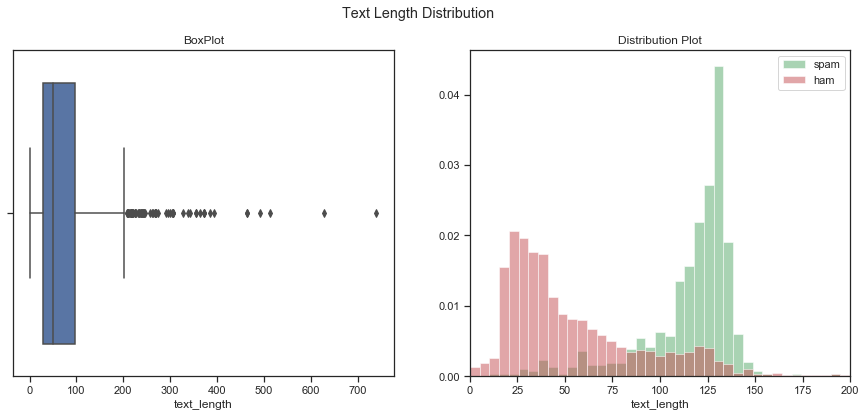

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6), constrained_layout=False)

ax1 = sns.boxplot(df.text_length, ax=ax1)
ax1.set(title='BoxPlot')

bins = np.linspace(0, 200, 40)
ax2 = sns.distplot(df[df['label'] == 'spam'].text_length, bins=bins, kde=False, norm_hist=True, 
                   hist_kws={'label':'spam', 'alpha':.5, 'color':'g'}, ax=ax2)
ax2 = sns.distplot(df[df['label'] == 'ham'].text_length, bins=bins, kde=False, norm_hist=True,
                   hist_kws={'label':'ham', 'alpha':.5, 'color':'r'}, ax=ax2)
ax2.set(title='Distribution Plot', xlim=(0,200))

plt.legend()
fig.suptitle('Text Length Distribution')
_ = plt.show()

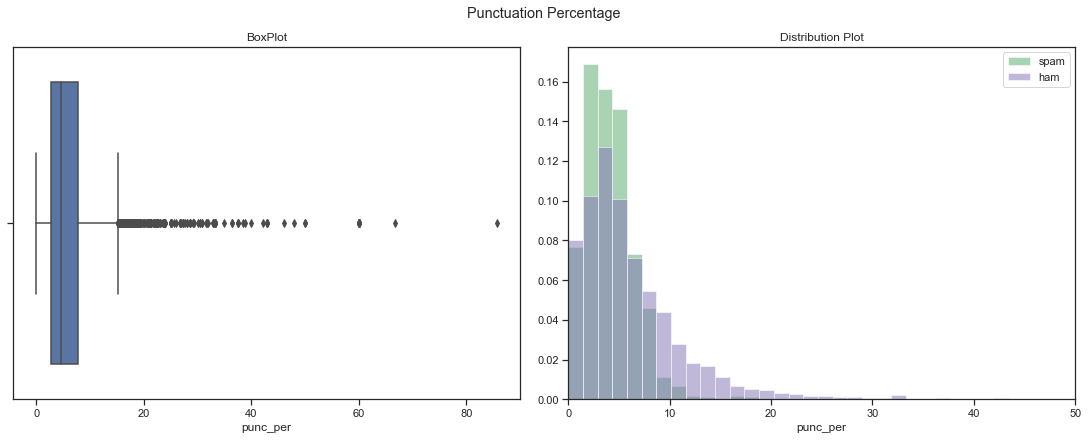

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6), constrained_layout=True)

ax1 = sns.boxplot(df.punc_per, ax=ax1)
ax1.set(title='BoxPlot')

bins = np.linspace(0, 100, 70)
ax2 = sns.distplot(df[df['label'] == 'spam'].punc_per, bins=bins, kde=False, norm_hist=True, 
                   hist_kws={'label':'spam', 'alpha':.5, 'color':'g'}, ax=ax2)
ax2 = sns.distplot(df[df['label'] == 'ham'].punc_per, bins=bins, kde=False, norm_hist=True,
                   hist_kws={'label':'ham', 'alpha':.5, 'color':'m'}, ax=ax2)
ax2.set(title='Distribution Plot', xlim=(0,50))

plt.legend()
fig.suptitle('Punctuation Percentage')
_ = plt.show()

### Observations
We can **observe** the below facts from the above visualizations.<br>
<li> Punctuation % is higher in <b>ham</b> emails.
<li> Text length is higher in <b>spam</b> emails.
<li> There are a lot of outliers in Text length and Punctuation %age.
<li> Punctuation %age values need to be transformed to Gaussian distribution.

In [29]:
df['punc_per_transformed'] = df['punc_per'].apply(lambda x : x**(1/5))

Text(0.5, 0.98, 'Transformed Punctuation %')

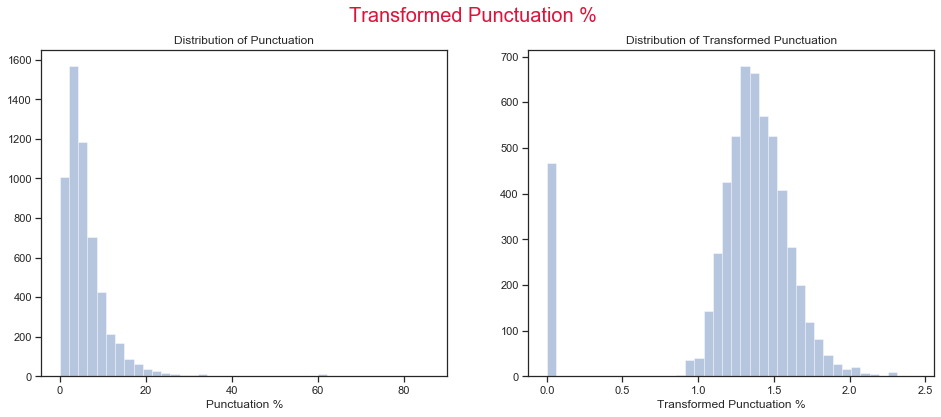

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,6))
sns.distplot(df['punc_per'], bins=40, kde=False, ax=ax1)
ax1.set(title='Distribution of Punctuation', xlabel='Punctuation %')

sns.distplot(df['punc_per_transformed'], bins=40, kde=False, ax=ax2)
ax2.set(title='Distribution of Transformed Punctuation', xlabel='Transformed Punctuation %')

fig.suptitle("Transformed Punctuation %", fontsize=20, color='crimson')

In this data we have texts so we need to convert them into numerical forms which could be easily interpreted by Machine Learning models.<br>
Let's create a word count Vector for the words we have in out Final text

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
# Create a word vector from the TF-IDF Model
tfidf_vector = TfidfVectorizer().fit_transform(df.final_text)
# Convert sparse matrix to dataFrame
tfidf_df = pd.DataFrame(tfidf_vector.toarray())
tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,9066,9067,9068,9069,9070,9071,9072,9073,9074,9075
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df['punc_per_transformed'] = df['punc_per'].apply(lambda x: round(x**(1/5),2))

In [34]:
X_features = pd.concat([df.punc_per_transformed, df.text_length, tfidf_df], axis=1)
X_features.head()

,punc_per_transformed,text_length,0,1,2,3,4,5,6,7,...,9066,9067,9068,9069,9070,9071,9072,9073,9074,9075
0,1.52,92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.83,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.31,128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.65,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.27,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Modeling
Let's Model and train the classifier using GaussianNB, BernoulliNB and MultinomialNB<br>
Visualize the Training and Test results by creating Decision Boundary

In [35]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

### Function to plot Confusion Matrix

In [36]:
# DataFrame to save the Metrics
df_score = pd.DataFrame(data={'Accuracy':[0,0,0], 'Precision':[0,0,0], 'Recall':[0,0,0,]}
                        , index=['GaussianNB', 'BernoulliNB', 'MultinomialNB'])

def plot_confusion_matrix(y_true, y_pred, classes,
                          title='Confusion matrix'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    from sklearn.metrics import confusion_matrix
    
    data = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(data, columns=classes, index = classes)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
#     print(df_cm)
    plt.figure(figsize = (8,6))
    plt.title(title, color='green', fontsize=25)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, color='indigo')
    plt.yticks(tick_marks, classes, color='indigo')
    sns.set(font_scale=1.4) #for label size
    sns.heatmap(df_cm, cmap="YlGnBu", annot=True, fmt="d", annot_kws={"size": 20})# font size 
    plt.tight_layout()
    plt.ylabel('Actual', color='crimson', fontsize=20)
    plt.xlabel('Predicted', color='crimson', fontsize=20)

In [37]:
X_train, X_test, y_train, y_test = train_test_split( X_features, df['label'], test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4457, 9078) (4457,)
Test set: (1115, 9078) (1115,)


In [38]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

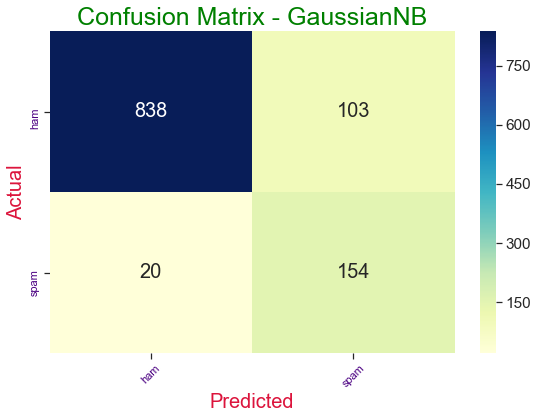

In [39]:
clf_name = 'GaussianNB'
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Capture the Score
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
df_score.loc[clf_name] = [round((y_pred == y_test).sum()/len(y_pred), 3), round(precision,3), round(recall,3)]

# Visualize the results
plot_confusion_matrix(y_test, y_pred, clf.classes_, title="Confusion Matrix - {}".format(clf_name))

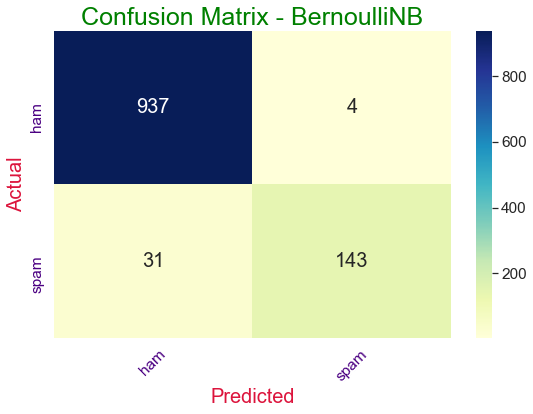

In [40]:
clf_name = 'BernoulliNB'
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_hat = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

# Capture the Score
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
df_score.loc[clf_name] = [round((y_pred == y_test).sum()/len(y_pred), 3), round(precision,3), round(recall,3)]

# Visualize the results
plot_confusion_matrix(y_test, y_pred, clf.classes_, title="Confusion Matrix - {}".format(clf_name))

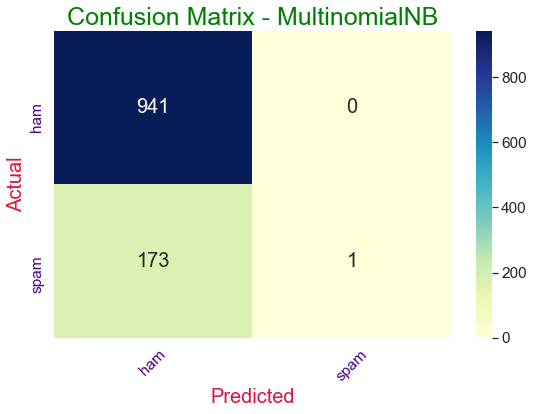

In [41]:
clf_name = 'MultinomialNB'
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_hat = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

# Capture the score
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
df_score.loc[clf_name] = [round((y_pred == y_test).sum()/len(y_pred), 3), round(precision,3), round(recall,3)]

# Visualize the results
plot_confusion_matrix(y_test, y_pred, clf.classes_, title="Confusion Matrix - {}".format(clf_name))

### Decision Boundary
As the problem falls into classification category and has no numerical attibutes association, decision boundary creation is not feasible.
Decision boundary can be very well represented by the Confusion Matrix, hence a nicely plotted Confusion matrix is created for all the Models.

In [43]:
df_score

,Accuracy,Precision,Recall
GaussianNB,0.890,0.599,0.885
BernoulliNB,0.969,0.973,0.822
MultinomialNB,0.845,1.000,0.006


### Looking at the Metrics for different Models the best classification was given by **BernoulliNB** with Accurracy of 96.9% and Precision of 97.3